In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

def polyani_wigner(s0,E,v,beta, Tmin, Tmax):
    #s0 is the inital surface coverage
    #E is activation energy of desorption
    #v is the frequency factor
    #beta = dT/dt
    #Tmin = initial temp, Tmax = final temp
    #T = temp, t = time

    #gas constant
    k = 8.314
    
    # ds/dt = - s * v * e^(-E/kT) = f(t,s)
    f = lambda t, s:  -s * v * np.exp(-E/(k*(beta*t+Tmin)))

    soln = solve_ivp(f,(Tmin,Tmax),[s0],'RK45',t_eval = np.arange(Tmin, Tmax, .1))

    return soln
    # returns surface coverage vs time data

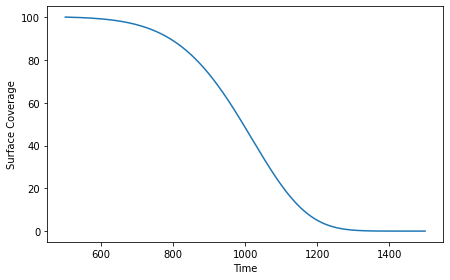

In [5]:
sol = polyani_wigner(100,125000,10*13,1,500,1500)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('Time')
plt.ylabel('Surface Coverage')
plt.tight_layout()
plt.show()

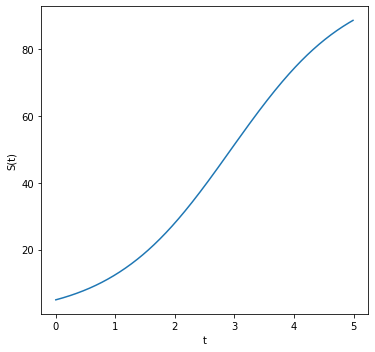

In [88]:
def generic_ode(y0, t0, tf):
    
    #ds/dt = f(t,s)

    f = lambda t, s: s*(1-s/100)
    
    soln = solve_ivp(f,(t0,tf),[y0],'RK45',t_eval = np.arange(t0, tf, .01))

    return soln

sol = generic_ode(5,0,5)

plt.figure(figsize = (10, 5))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('t')
plt.ylabel('S(t)')
plt.tight_layout()
plt.show()

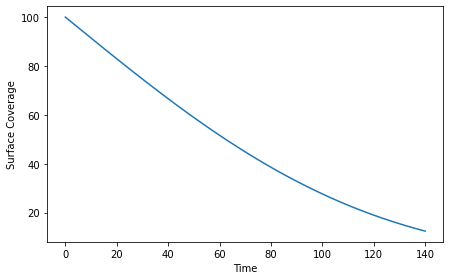

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import solve_ivp

def polyani_wigner(s0,E,v,beta, t_min, t_max, T0):
    #s0 is the inital surface coverage
    #E is activation energy of desorption
    #v is the frequency factor
    #beta = dT/dt
    #Tmin = initial temp, Tmax = final temp
    #T = temp, t = time

    #T = beta*t+T0

    #gas constant
    k = 8.314
    
    # ds/dt = - s * v * e^(-E/kT) = f(t,s)
    f = lambda t, s:  -s * v * np.exp(-E/(k*(beta*t+T0)))

    soln = solve_ivp(f,(t_min,t_max),[s0],'RK45',t_eval = np.arange(t_min, t_max, .1))

    return soln
    # returns surface coverage vs time data

sol = polyani_wigner(100, 11000, 1,.5,0, 140, 278.15)

plt.figure(figsize = (12, 4))
plt.subplot(121)
plt.plot(sol.t, sol.y[0])
plt.xlabel('Time')
plt.ylabel('Surface Coverage')
plt.tight_layout()
plt.show()